# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', None)

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [7]:
df_data.sample(n=30, random_state=10).sort_index()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
392,392,392,Roscosmos,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Thu Dec 01, 2016 14:52 UTC",Soyuz U | Progress MS-04,StatusRetired,NaN,Failure
566,566,566,Arianespace,"ELS, Guiana Space Centre, French Guiana, France","Thu Apr 03, 2014 21:02 UTC",Soyuz ST-A/Fregat-M | Sentinel 1A,StatusActive,NaN,Success
815,815,815,ULA,"SLC-17B, Cape Canaveral AFS, Florida, USA","Wed Jun 11, 2008 16:05 UTC",Delta II 7920H-10C | GLAST,StatusRetired,NaN,Success
922,922,922,Boeing,"SLC-2W, Vandenberg AFB, California, USA","Fri Apr 28, 2006 10:02 UTC","Delta II 7420-10C | CloudSat, CALIPSO",StatusRetired,NaN,Success
934,934,934,MHI,"LA-Y1, Tanegashima Space Center, Japan","Tue Jan 24, 2006 01:33 UTC",H-IIA 2022 | Daichi,StatusRetired,NaN,Success
1382,1382,1382,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Tue Jul 01, 1997 18:02 UTC",Space Shuttle Columbia | STS-94,StatusRetired,450.0,Success
1573,1573,1573,VKS RF,"Site 32/2, Plesetsk Cosmodrome, Russia","Wed May 25, 1994 10:14 UTC",Tsyklon-3 | Cosmos 2281,StatusRetired,NaN,Failure
1576,1576,1576,Martin Marietta,"SLC-41, Cape Canaveral AFS, Florida, USA","Tue May 03, 1994 15:55 UTC",Titan IV(401)A | Trumpet,StatusRetired,NaN,Success
1781,1781,1781,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Wed Nov 28, 1990",Tsyklon-3 | Cosmos 2106,StatusRetired,NaN,Success
1920,1920,1920,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia","Tue Oct 11, 1988 08:01 UTC",Tsyklon-3 | Cosmos 1975,StatusRetired,NaN,Success


In [8]:
#df_data['Date'] = pd.to_datetime(df_data['Date'], format="%a %b %d, %Y %H:%M %Z")
print(*[df_data.isna().any(), df_data.duplicated().any()], sep='\n\n')

Unnamed: 0.1      False
Unnamed: 0        False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [9]:
df_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [10]:
price_isna_check = df_data[df_data['Price'].isna()]
print(price_isna_check.shape)
price_isna_check.head()

(3360, 7)


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success


#### Missing values too much. just will be ignored.

## Descriptive Statistics

In [11]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Tue Aug 28, 1990 09:05 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [12]:
pd.DataFrame.value_counts?

Signature:
pd.DataFrame.value_counts(
    self,
    subset: 'IndexLabel | None' = None,
    normalize: 'bool' = False,
    sort: 'bool' = True,
    ascending: 'bool' = False,
    dropna: 'bool' = True,
) -> 'Series'
Docstring:
Return a Series containing the frequency of each distinct row in the Dataframe.

Parameters
----------
subset : label or list of labels, optional
    Columns to use when counting unique combinations.
normalize : bool, default False
    Return proportions rather than frequencies.
sort : bool, default True
    Sort by frequencies when True. Sort by DataFrame column values when False.
ascending : bool, default False
    Sort in ascending order.
dropna : bool, default True
    Don't include counts of rows that contain NA values.

    .. versionadded:: 1.3.0

Returns
-------
Series

See Also
--------
Series.value_counts: Equivalent method on Series.

Notes
-----
The returned Series will have a MultiIndex with one level per input
column but an Index (non-multi) for a s

In [19]:
val_count_list = []
for x in df_data.columns:
    if str(x) != 'Date' and str(x) != 'Detail':
        val_count_list.append(df_data[str(x)].value_counts())
print(*val_count_list, sep="\n\n")

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Rocket Lab            13
ISA                   13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
JAXA                   7
Land Launch            7
MITT                   7
UT                     5
CASIC                  5
KCST                   5
Exos                   4
CECLES                 4
Arm??e de l'

In [30]:
df_data['Organisation'].value_counts()

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Rocket Lab            13
ISA                   13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
JAXA                   7
Land Launch            7
MITT                   7
UT                     5
CASIC                  5
KCST                   5
Exos                   4
CECLES                 4
Arm??e de l'

In [47]:
df_data['Organisation']

0                 SpaceX
1                   CASC
2                 SpaceX
3              Roscosmos
4                    ULA
5                   CASC
6              Roscosmos
7                   CASC
8                 SpaceX
9                   JAXA
10              Northrop
11                ExPace
12                  CASC
13                   IAI
14                  CASC
15            Rocket Lab
16                  CASC
17                SpaceX
18                  CASC
19                  CASC
20                SpaceX
21            Rocket Lab
22                  CASC
23                SpaceX
24                  CASC
25                SpaceX
26                  CASC
27          Virgin Orbit
28                VKS RF
29                   MHI
30                   ULA
31                ExPace
32                  CASC
33             Roscosmos
34                SpaceX
35                  IRGC
36                  CASC
37             Roscosmos
38                   ULA
39                  CASC


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [109]:
org_count = df_data['Organisation'].value_counts()
org_count_b = org_count[(org_count.index != "RVSN USSR") & (org_count.values > 13)]
org_count_s = org_count[(org_count.index != "RVSN USSR") & (org_count.values < 25)]

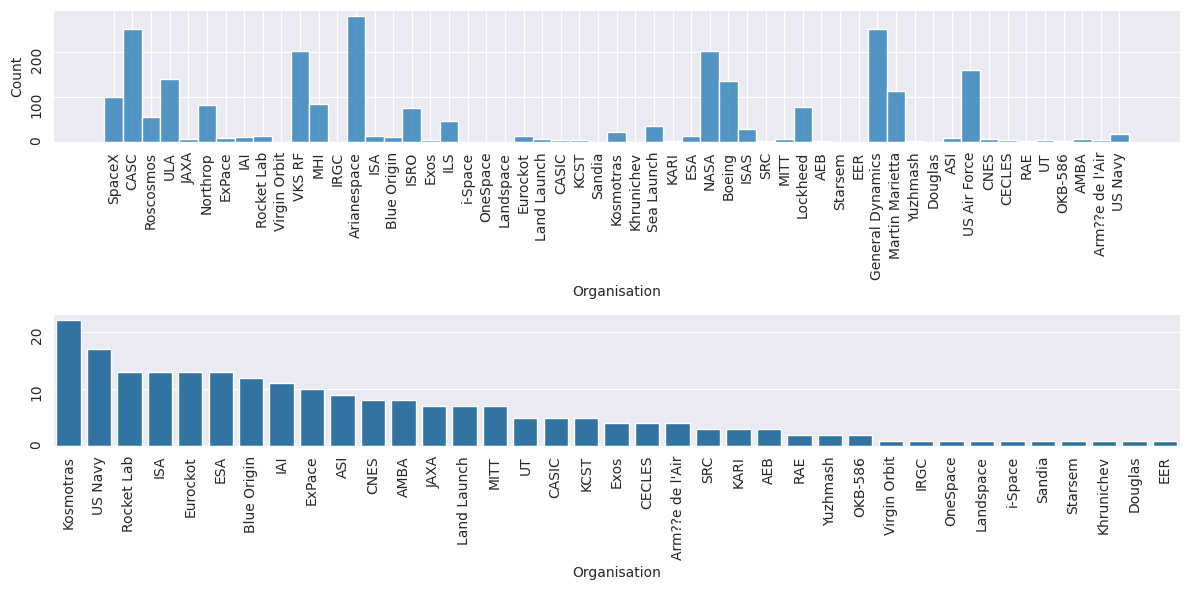

Outlier:

  Organisation  count
0    RVSN USSR   1777


In [110]:
with sns.axes_style('darkgrid'):
    #plt.figure(figsize=(11, 4), dpi=150)
    fig, axs = plt.subplots(2,1, figsize=(12,6), dpi=100)
    sns.histplot(df_data[df_data['Organisation'] != 'RVSN USSR']['Organisation'], ax=axs[0])
    axs[0].tick_params(rotation=90)
    
    sns.barplot(x=org_count_s.index, y=org_count_s.values, ax=axs[1])
    axs[1].tick_params(rotation=90)
    
    plt.tight_layout()
    plt.show()
print(*['Outlier:', df_data[df_data['Organisation'] == 'RVSN USSR']['Organisation'].value_counts().reset_index()], sep="\n\n")

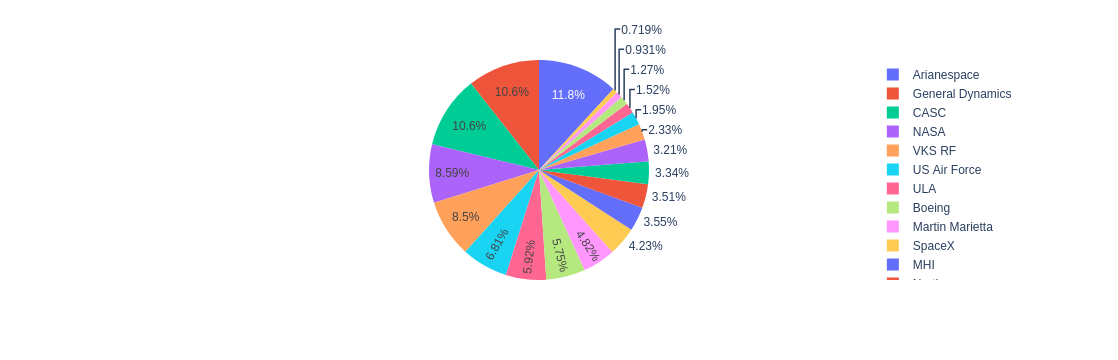

In [103]:
px.pie(names=org_count_b.index, values=org_count_b.values, color=org_count_b.index)

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

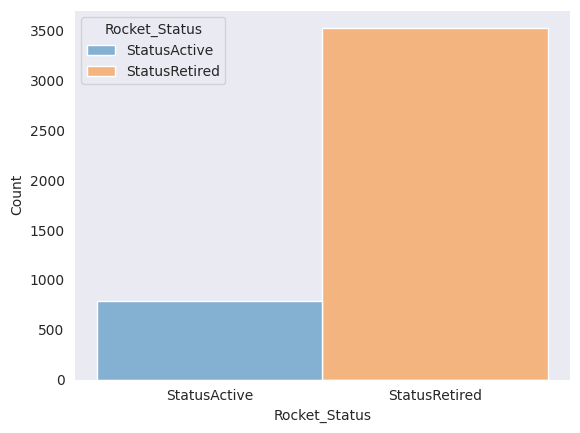

In [141]:
with sns.axes_style('dark'):
    sns.histplot(df_data, x='Rocket_Status', hue='Rocket_Status')

In [145]:
status_count = df_data['Rocket_Status'].value_counts()
print(f"The rate of active to retired:{round(status_count.iloc[1]/status_count.iloc[0], 2)}")

The rate of active to retired:0.22


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

# Use a Choropleth Map to Show the Number of Failures by Country


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

# Analyse the Amount of Money Spent by Organisation per Launch

# Chart the Number of Launches per Year

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 